# Tutoriel débutant Python 2

### 2.1 Bref commentaire sur les modules en Python
> Les modules sont des regroupements de fonctions (ou classes) qui permettent d'utiliser ses dernières dans son script Python. Les prochaines cellules illustrent comment importer et utiliser des fonctions et des classes provenant de modules extérieurs. 
> Par exemple, le module *numpy* offre des objets en N-dimension de type array, des opérations d'algèbre linéaire ainsi que des transformés de Fourier.

In [2]:
import time
 
time.asctime() # nous appelons la fonction asctime du module time en 
    # écrivant le nom du module que nous avons importé suivie
    # d'un point et de la fonction que nous désirons utiliser.

'Sun Aug  2 22:03:32 2020'

In [3]:
import numpy as np # nous pouvons renommer les modules dans notre code
    # tel que nous pouvons les appeler avec ce nouveau nom. Nous utilisons
    # le mot-clé "as" dans ce cas

np.linspace(0.1, 10) # même situation que dans le cas précédent, mis
    # à part que nous utilisons notre nom np à la place de numpy
    # suivie du point et de la fonction que nous vous désirez

array([ 0.1       ,  0.30204082,  0.50408163,  0.70612245,  0.90816327,
        1.11020408,  1.3122449 ,  1.51428571,  1.71632653,  1.91836735,
        2.12040816,  2.32244898,  2.5244898 ,  2.72653061,  2.92857143,
        3.13061224,  3.33265306,  3.53469388,  3.73673469,  3.93877551,
        4.14081633,  4.34285714,  4.54489796,  4.74693878,  4.94897959,
        5.15102041,  5.35306122,  5.55510204,  5.75714286,  5.95918367,
        6.16122449,  6.36326531,  6.56530612,  6.76734694,  6.96938776,
        7.17142857,  7.37346939,  7.5755102 ,  7.77755102,  7.97959184,
        8.18163265,  8.38367347,  8.58571429,  8.7877551 ,  8.98979592,
        9.19183673,  9.39387755,  9.59591837,  9.79795918, 10.        ])

In [4]:
from numpy import array # nous pouvons également importer seulement
    # des fonctions ou des classes particulières d'un module
    # avec le keyword import.

array([1,2,3,4]) # puisque nous avons directement importé la classe array
    # nous n'avons pas besoin d'écrire le nom du module suivi d'un point 
    # avant la classe.

array([1, 2, 3, 4])

### 2.2 Ouvrir des fichiers et comprendre sa position sur son disque dur en Python
> Le module $os$ permet d'interagir avec son système de fichiers, que ce soit sur Windows, ou bien sur Mac ou Linux. Ce module nous offre la possibilité d'ouvrir des fichiers qui sont dans différents dossiers. 

In [5]:
import os

In [6]:
os.getcwd() # imprime le dossier actuel de travail

'/home/jackson/PycharmProjects/python-tutorials/pandas'

In [7]:
os.listdir() # imprimes les fichiers dans votre dossier actuel

['solutionnaire2.ipynb',
 '.ipynb_checkpoints',
 'bitcoin_history.csv',
 'beginner_workshop2.ipynb',
 'tutoriel_débutant2.ipynb',
 'answers_2.ipynb',
 'starWarsClean.csv']

> Un scénario habituel est l'ouverture d'un fichier dans un dossier spécifique. Nous allons ouvrir le fichier 'starWarsClean.csv' que vous pouvez télécharger [içi](https://drive.google.com/file/d/1XNGKtLzBacQaaP7PgPgyfBHc3Ux1nl2w/view?usp=sharing). J'assume qu'après téléchargement, ce fichier se trouve dans votre dossier téléchargement. Ce dossier correspond probablement à un emplacement similaire à cela:  
![path](https://i.ibb.co/kS9XkKR/image.png)  
Notez les "backwards slashes" (\) sur Windows. Tandis que sur Linux ou Mac, ce sont des "forwards slashes" (/). Donc on transcrirait ce path comme le suivant:

In [8]:
PATH = "C:\\Users\\mystery\\Downloads" # on windows, we have to double backslashes
PATH = "/home/jackson/PycharmProjects/python-tutorials/pandas/" # on linux/mac, slashes
filename = "bitcoin_history.csv"

os.path.join(PATH, filename) # s'occupe des slashes automatiquement

'/home/jackson/PycharmProjects/python-tutorials/pandas/bitcoin_history.csv'

> Parfait, maintenant que nous somme capables d'avoir accès à des fichiers n'importe ou sur notre ordinateur, nous allons ouvrir le jeu de données.

### 2.3 Les DataFrame "Pandas"
> Le module pandas offre énormément de fonctionnalité pour les programmeurs jouant avec des jeux de données. Les DataFrame sont une composante intégrale de pandas qui correspond à une structure de données ayant des rangées ainsi que des colonnes. Les rangées, et les colonnes, sont identifiées par des noms. Nous pouvons ouvrir un fichier .csv directement en DataFrame avec la fonctionnalité "read_csv".

In [1]:
!pip install expects

In [9]:
from expects import expect, equal, contain_exactly
import pandas as pd

# open the file "bitcoin_history.csv"
#bitcoin_data = pd.read_csv(os.path.join(PATH, filename))
# let's be lazy
bitcoin_data = pd.read_csv("https://raw.githubusercontent.com/erikmagic/python-tutorials/master/pandas/bitcoin_history.csv")
'''
import io
from google.colab import files
uploaded = files.upload()
star_wars_data = pd.read_csv(io.StringIO(uploaded['bitcoin_history.csv'].decode()))
'''

bitcoin_data.head() # head() returns the 5 first rows by default

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 02, 2020","11,118.9","11,802.6","12,061.1","10,730.7",647.23K,-5.80%
1,"Aug 01, 2020","11,803.1","11,333.2","11,847.7","11,226.1",611.47K,4.14%
2,"Jul 31, 2020","11,333.4","11,096.5","11,434.8","10,964.6",530.95K,2.14%
3,"Jul 30, 2020","11,096.2","11,105.8","11,164.4","10,861.6",501.14K,-0.09%
4,"Jul 29, 2020","11,105.9","10,908.4","11,336.5","10,771.8",576.83K,1.81%


#### 2.3.1 Les différentes façons d'accéder aux données dans un DataFrame

> La fonction employée dans la cellule précédente était *head()* qui affiche les 5 premières rangées par défaut, avec toutes les colonnes. Les fonctions *iloc* et *loc* nous donne plus de flexibilité. Ces fonctions sont basées sur les principes du _slicing_ et du _indexing_, vu précédemment.  
*iloc* nous permet d'accéder à nos données avec des indices (entrants numériques) tandis que *loc* nous permet d'accéder à nos données avec le nom des colonnes et des rangées.

In [10]:
# iloc fonctionne avec des valeurs numériques
bitcoin_data.iloc[0] # retourne la première rangée

Date        Aug 02, 2020
Price           11,118.9
Open            11,802.6
High            12,061.1
Low             10,730.7
Vol.             647.23K
Change %          -5.80%
Name: 0, dtype: object

In [11]:
# iloc peut retourner plusieurs rangées avec des listes comme entrant
bitcoin_data.iloc[[0,2,3]] # retourne la première, troisième ainsi que la quatrième rangée

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 02, 2020","11,118.9","11,802.6","12,061.1","10,730.7",647.23K,-5.80%
2,"Jul 31, 2020","11,333.4","11,096.5","11,434.8","10,964.6",530.95K,2.14%
3,"Jul 30, 2020","11,096.2","11,105.8","11,164.4","10,861.6",501.14K,-0.09%


In [12]:
# iloc fonctionne également avec le slicing
bitcoin_data.iloc[:5] # les 5 premières rangées ( l' équivalent de .head())

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 02, 2020","11,118.9","11,802.6","12,061.1","10,730.7",647.23K,-5.80%
1,"Aug 01, 2020","11,803.1","11,333.2","11,847.7","11,226.1",611.47K,4.14%
2,"Jul 31, 2020","11,333.4","11,096.5","11,434.8","10,964.6",530.95K,2.14%
3,"Jul 30, 2020","11,096.2","11,105.8","11,164.4","10,861.6",501.14K,-0.09%
4,"Jul 29, 2020","11,105.9","10,908.4","11,336.5","10,771.8",576.83K,1.81%


In [12]:
# iloc peut également être utilisé afin de retourner seulement certaines colonnes
bitcoin_data.iloc[:5, :2] #retourne les deux premières colonnes des 5 premières rangées

,id,Seen_StarWars
0,3292879998,Yes
1,3292879538,No
2,3292765271,Yes
3,3292763116,Yes
4,3292731220,Yes


Dans l'exemple précédent 
```
bitcoin_data.iloc[:5, :2]
```
Remarquez la virgule,  elle sépare les rangées des colonnes. La ligne suivante
```
bitcoin_data.iloc[:, :]
```
retourne l'ensemble des données dans le DataFrame. La suivante
```
bitcoin_data.iloc[0:1, 0:1]
```
retourne le premier élément (première rangée et première colonne).



In [13]:
bitcoin_data.iloc[0:1, 0:1]

,Date
0,"Aug 02, 2020"


In [14]:
type(bitcoin_data.iloc[0:1, 0:1]) # retourne en fait un DataFrame

pandas.core.frame.DataFrame

In [15]:
bitcoin_data.iloc[0, 0] # même chose que la cellule précédente

'Aug 02, 2020'

In [16]:
type(bitcoin_data.iloc[0, 0]) # retourne la valeur dans cette case

str

In [17]:
# on peut également donner des listes comme entrées
bitcoin_data.iloc[[0,1,3], [4, 5]]

,Low,Vol.
0,"10,730.7",647.23K
1,"11,226.1",611.47K
3,"10,861.6",501.14K


> La fonction *loc* fonctionne avec des entrants en texte représentant le nom d'une rangée ou d'une colonne. 

In [18]:
bitcoin_data.loc[[0, 1, 2]] # en fait içi, nos noms de rangées sont des numéros

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 02, 2020","11,118.9","11,802.6","12,061.1","10,730.7",647.23K,-5.80%
1,"Aug 01, 2020","11,803.1","11,333.2","11,847.7","11,226.1",611.47K,4.14%
2,"Jul 31, 2020","11,333.4","11,096.5","11,434.8","10,964.6",530.95K,2.14%


In [19]:
bitcoin_data.loc[:5, ['Fan', 'Princess.Leia']] # 5 première rangée et seulement 2 colonnes

,Fan,Princess.Leia
0,Yes,Very favorably
1,NaN,NaN
2,No,Somewhat favorably
3,Yes,Very favorably
4,Yes,Somewhat favorably
5,Yes,Very favorably


#### Exercice 1
> Affichez la valeur de *Open* de la troisième date dans notre DataFrame en utilisant la fonction _loc_.

In [20]:
x = None # assign the proper value to this variable

expect(x).to(equal('11,096.5'))

AssertionError: 

#### Exercice 2
> Affichez tous les *Change %* dans notre DataFrame en utilisant la fonction _loc_.

In [19]:
x = None
expect(list(x)).to((contain_exactly(*list(pd.read_csv("https://raw.githubusercontent.com/erikmagic/python-tutorials/master/pandas/bitcoin_history.csv")["Change %"]))))

TypeError: 'NoneType' object is not iterable

### 2.4 Visualisation avec les DataFrames pandas
> Les DataFrame pandas nous offrent directement la possibilité de visualiser nos données de différentes façons. Nous pouvons utiliser la fonction _plot_ directement sur un DataFrame que nous avons défini. La visualisation avec le module pandas nécessite le module *matplotlib*. Le module *matplotlib* est fréquemment utilisé pour la visualisation, également sur d'autres structures de données que les DataFrames de pandas comme des listes ou des arrays numpy.

In [25]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
plt.close('all')

In [20]:
# petit détour pour catégoriser nos données
bitcoin_data['numerical_change'] = bitcoin_data['Change %'].str.extract("([-+]?\d+.\d+)")[0].astype("float")
bitcoin_data['yield'] = pd.cut( bitcoin_data.numerical_change
                               , 3
                               , labels=['low yield', 'medium yield', 'high yield'])

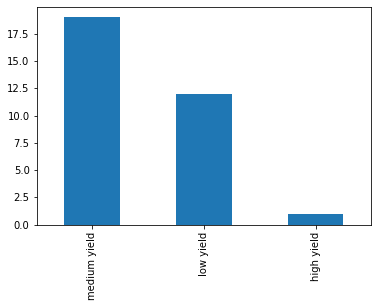

In [21]:
bitcoin_data['yield'].value_counts().plot(kind='bar')

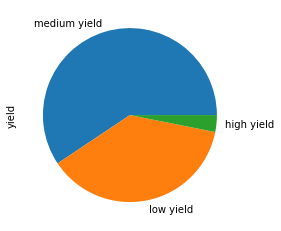

In [22]:
bitcoin_data['yield'].value_counts().plot(kind='pie')

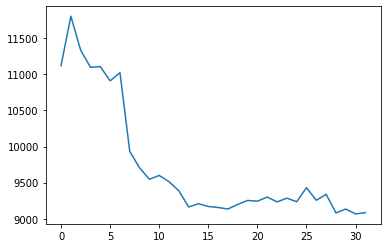

In [23]:
# remarquer le problème avec le graphique suivant!

bitcoin_data['numerical_price'] = bitcoin_data.Price.str.replace(",", "").astype("float")
bitcoin_data.numerical_price.plot()

### 2.4 Plus d'outils avec matplotlib.pyplot
> Nous avons vu comment tracer des graphiques simples directement à partir d'un DataFrame. Par contre, quoique efficiente, cette façon est très limitée. Nous avons beaucoup plus d'options en utilisant les "subplots" de matplotlib.pyplot directement. Les avantages de matplotlib selon Wikipedia sont:  
* Export possible en de nombreux formats matriciels (PNG, JPEG...) et vectoriels (PDF, SVG...)  
* Documentation en ligne en quantité, nombreux exemples disponibles sur internet  
* Forte communauté très active  
* Interface pylab : reproduit fidèlement la syntaxe MATLAB  
* Bibliothèque haut niveau : idéale pour le calcul interactif  

> Deux autres packages pour la visualisation disponible en Python sont *plotly* et *seaborn*.  
Rajoutons désormais des descriptions pour nos axes, un titre et une légende à notre graphique. Nous pouvons même changer la taille de nos graphes.

/home/jackson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


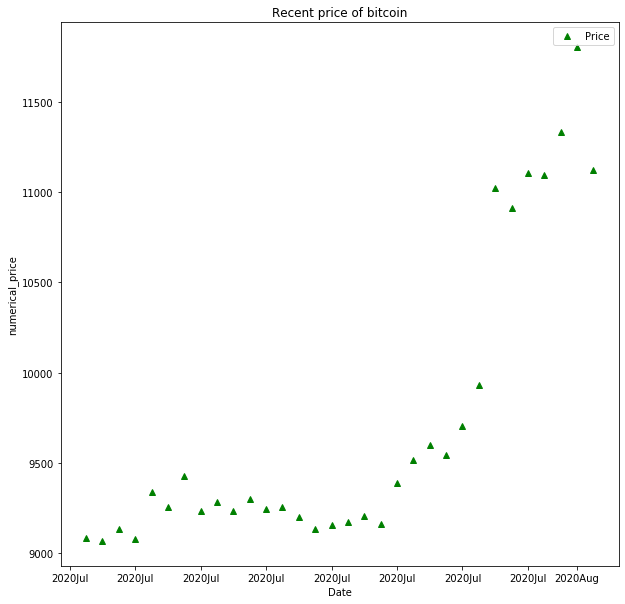

In [26]:
bitcoin_dat = bitcoin_data[['Date', 'numerical_price']]
bitcoin_dat['Date'] = pd.to_datetime(bitcoin_dat.Date, format="%b %d, %Y")
bitcoin_dat.set_index("Date", inplace=True)

fig, ax = plt.subplots(figsize=(10,10)) # modifier la taille de notre graphe. 
                # la taille défaut est 6.4 * 6.4 pouces
plt.plot(bitcoin_dat, 'g^')
plt.xlabel('Date')
plt.ylabel('numerical_price')
plt.legend(['Price'])
plt.title('Recent price of bitcoin')

date_fmt = mdates.DateFormatter("%Y%b")
ax.xaxis.set_major_formatter(date_fmt)


/home/jackson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


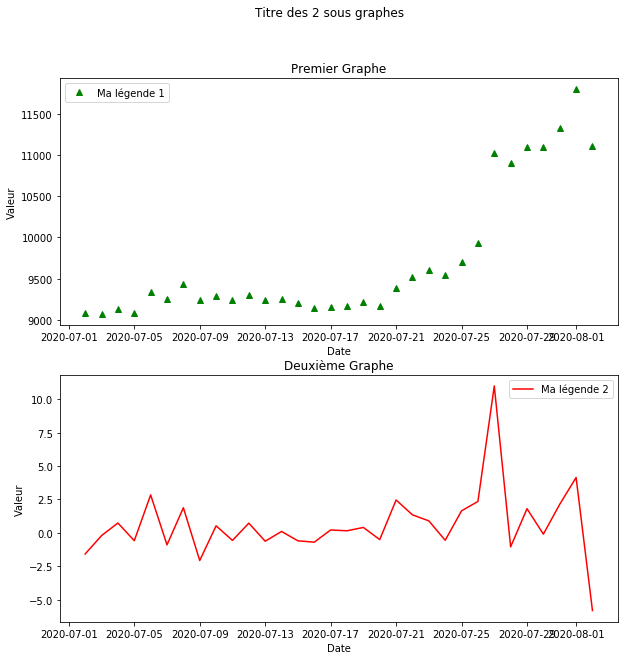

In [27]:
bitcoin_chg = bitcoin_data[['Date', 'numerical_change']]
bitcoin_chg['Date'] = pd.to_datetime(bitcoin_chg.Date, format="%b %d, %Y")
bitcoin_chg.set_index("Date", inplace=True)


figure, axes = plt.subplots(2, 1, figsize=(10,10)) # 2 * 1 graphes avec la dimension spécifiée
# écrivons le titre de l'ensemble de graphe.
figure.suptitle('Titre des 2 sous graphes')

# retrouvons les axes de notre "subplots" qui représent des sous-graphes dans notre image
ax1 = axes[0]
ax2 = axes[1]

# affichons le premier dataframe en vert
ax1.plot(bitcoin_dat, 'g^')

# affichons le deuxième dataframe en rouge
ax2.plot(bitcoin_chg, 'r-')


# écrivons les titres des sous graphes
ax1.set_title('Premier Graphe')
ax2.set_title('Deuxième Graphe')

# écrivons des descriptions des axes des sous graphes
ax1.set_xlabel('Date')
ax2.set_xlabel('Date')

ax1.set_ylabel('Valeur')
ax2.set_ylabel('Valeur')

# écrivons des légendes
ax1.legend(['Ma légende 1'])
ax2.legend(['Ma légende 2'])




### 2.5 Statistiques descriptive avec les DataFrame pandas
> Nous pouvons directement générer une description qui résume notre jeu de données lorsqu'il est dans le format DataFrame. Par défaut, la description ciblera tous les colonnes numériques.

In [28]:
bitcoin_dat.describe()

,numerical_price
count,32.000000
mean,9720.225000
std,826.585179
min,9067.100000
25%,9191.575000
50%,9292.950000
75%,9761.200000
max,11803.100000


In [29]:
# nous pouvons également afficher d'autres types
# de données avec 'object' dans la liste à inclure
include = ['object', 'float', 'int']
bitcoin_dat.describe(include=include)

,numerical_price
count,32.000000
mean,9720.225000
std,826.585179
min,9067.100000
25%,9191.575000
50%,9292.950000
75%,9761.200000
max,11803.100000


> Nous allons concevoir un jeu de données aléatoires afin d'utiliser d'autres types de graphiques que ceux s'appliquant aux données catégoriques. Nous pourrions utiliser un vrai jeu de données, mais nous allons utiliser des données générer aléatoirement avec la fonction *randn* question d'efficacité.


In [ ]:
import numpy as np
# 1000 données
x = np.random.randn(1000)
y = pd.date_range('1/1/2019', periods=1000)
df = pd.DataFrame(data=x, index=y)
# nous pouvons changer le nom des colonnes
df.columns = ['Valeur']
df.head()

#### Exercice 3
> Reproduisez l'image suivante: 
![e3](https://i.ibb.co/263BrW8/image.png)  
Tel que la taille est de 9 pouces * 9 pouces, les points sont des cercles, la couleur des points est jaune et on voit les informations (axes, légende..) sur l'image. Prenez notre jeu de données _df_. Évidemment vos points seront différents puisque le jeu de données est simulé aléatoirement.

In [34]:
# remplissez l'exercice 3 içi

